# Predicting the Value of Football Players using Player Statistics from Fotmob

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Loading in the Data

The player data was scraped from [Fotmob](https://www.fotmob.com) using our own designed web scraper. We chose to scrape player statistics from the 2020-2021 and 2021-2022 seasons as they are the most recent statistics.

In [2]:
df = pd.read_excel('playerdata.xlsx')

In [3]:
df

,name,height,age,value,preferred_foot,average_rating_2021,matches_started_2021,subbed_in_2021,subbed_out_2021,minutes_played_2021,...,shots_off_target_2020,assists_2020,key_passes_2020,total_passes_2020,attempted_dribbles_2020,successful_dribbles_2020,attempted_tackles_2020,successful_tackles_2020,clearances_2020,interceptions_won_2020
0,Roberto Soriano,181,31,8.50,Both,6.97,26.0,1.0,10.0,2121,...,19.0,6.0,52.0,1456,56.0,36.0,48.0,26.0,42.0,18.0
1,Musa Barrow,183,23,22.00,Right,6.94,19.0,6.0,16.0,1592,...,26.0,8.0,60.0,1003,71.0,34.0,26.0,10.0,13.0,11.0
2,Nicola Sansone,175,30,3.20,Right,6.42,6.0,16.0,5.0,768,...,11.0,2.0,31.0,473,60.0,34.0,22.0,11.0,7.0,9.0
3,Ricardo Orsolini,183,25,11.00,Left,6.99,17.0,5.0,13.0,1367,...,19.0,3.0,30.0,615,64.0,36.0,37.0,18.0,21.0,10.0
4,Emanuel Vignato,175,21,4.20,Right,6.43,3.0,19.0,3.0,557,...,7.0,4.0,26.0,628,38.0,23.0,18.0,9.0,7.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Amadou Traore,175,20,0.65,Right,5.68,NaN,1.0,NaN,19,...,1.0,1.0,6.0,74,24.0,9.0,6.0,1.0,2.0,1.0
566,M'baye Niang,184,27,5.00,Right,5.99,1.0,15.0,1.0,342,...,4.0,NaN,2.0,78,7.0,1.0,3.0,2.0,2.0,1.0
567,Hwang Ui-Jo,184,29,5.50,Both,6.67,23.0,1.0,15.0,1946,...,30.0,3.0,21.0,467,54.0,26.0,14.0,6.0,12.0,8.0
568,Sekou Mara,183,19,2.20,Right,6.18,5.0,13.0,5.0,551,...,NaN,2.0,2.0,61,5.0,3.0,5.0,3.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      570 non-null    object 
 1   height                    570 non-null    int64  
 2   age                       570 non-null    int64  
 3   value                     570 non-null    float64
 4   preferred_foot            544 non-null    object 
 5   average_rating_2021       570 non-null    float64
 6   matches_started_2021      546 non-null    float64
 7   subbed_in_2021            547 non-null    float64
 8   subbed_out_2021           539 non-null    float64
 9   minutes_played_2021       570 non-null    int64  
 10  yellow_cards_2021         449 non-null    float64
 11  goals_2021                464 non-null    float64
 12  expected_goals_2021       565 non-null    float64
 13  goals_in_box_2021         453 non-null    float64
 14  goals_out_

There appears to be some null values. We choose to fill those null values with 0, as Fotmob does not list statistics of players with value 0.

In [5]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      570 non-null    object 
 1   height                    570 non-null    int64  
 2   age                       570 non-null    int64  
 3   value                     570 non-null    float64
 4   preferred_foot            570 non-null    object 
 5   average_rating_2021       570 non-null    float64
 6   matches_started_2021      570 non-null    float64
 7   subbed_in_2021            570 non-null    float64
 8   subbed_out_2021           570 non-null    float64
 9   minutes_played_2021       570 non-null    int64  
 10  yellow_cards_2021         570 non-null    float64
 11  goals_2021                570 non-null    float64
 12  expected_goals_2021       570 non-null    float64
 13  goals_in_box_2021         570 non-null    float64
 14  goals_out_

In [6]:
# check which players have average_rating of 0
df[(df["average_rating_2020"] ==0) | (df['average_rating_2021'] == 0)]

,name,height,age,value,preferred_foot,average_rating_2021,matches_started_2021,subbed_in_2021,subbed_out_2021,minutes_played_2021,...,shots_off_target_2020,assists_2020,key_passes_2020,total_passes_2020,attempted_dribbles_2020,successful_dribbles_2020,attempted_tackles_2020,successful_tackles_2020,clearances_2020,interceptions_won_2020
38,Daniel Maldini,181,20,2.2,Right,6.93,2.0,6.0,2.0,148,...,0.0,0.0,0.0,13,2.0,2.0,1.0,0.0,0.0,0.0
432,Omar Marmoush,177,23,4.4,Right,7.08,15.0,3.0,11.0,1326,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0


We notice that there are a few players with an average rating of 0 in either of the past 2 seasons he played, which means that he didn't have sufficient playing time to be rated in those seasons, so we will remove these players.

In [7]:
# remove these players
df = df[df["average_rating_2020"] !=0]
df = df[df["average_rating_2021"] !=0]

# Exploratory Data Analysis

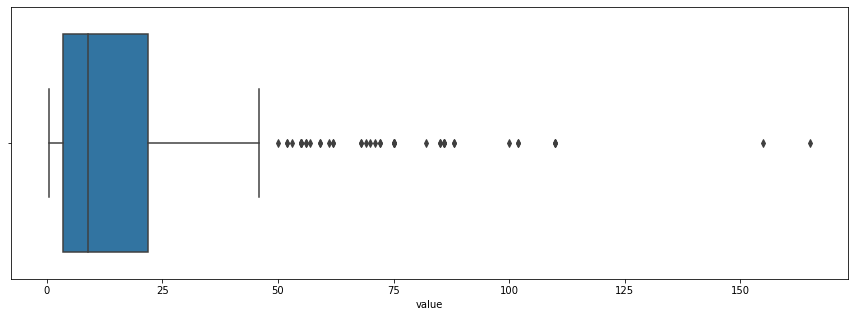

In [8]:
plt.figure(figsize=(15, 5))
sb.boxplot(x="value", data=df)

There are a few players with value more than 100 million euros, and we choose to consider them as outliers so we remove them.

In [9]:
# remove outliers
df = df[df["value"] < 100]

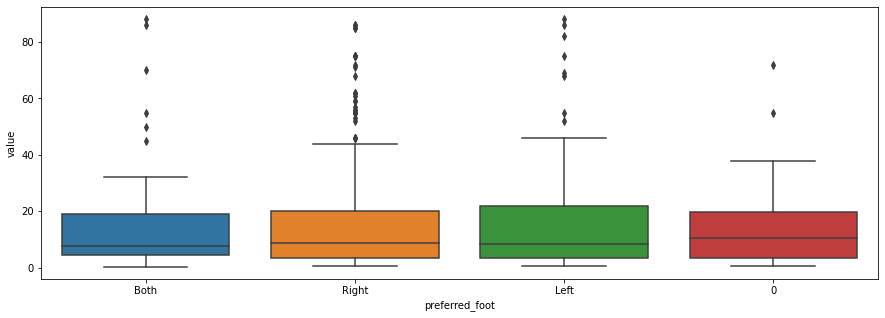

In [10]:
plt.figure(figsize=(15, 5))
sb.boxplot(x="preferred_foot", y="value", data=df)

There does not appear to be a strong relationship between preferred_foot and value so we choose not to include this variable.

In [11]:
df = df.drop(columns = ['preferred_foot'])

<Figure size 1080x360 with 0 Axes>

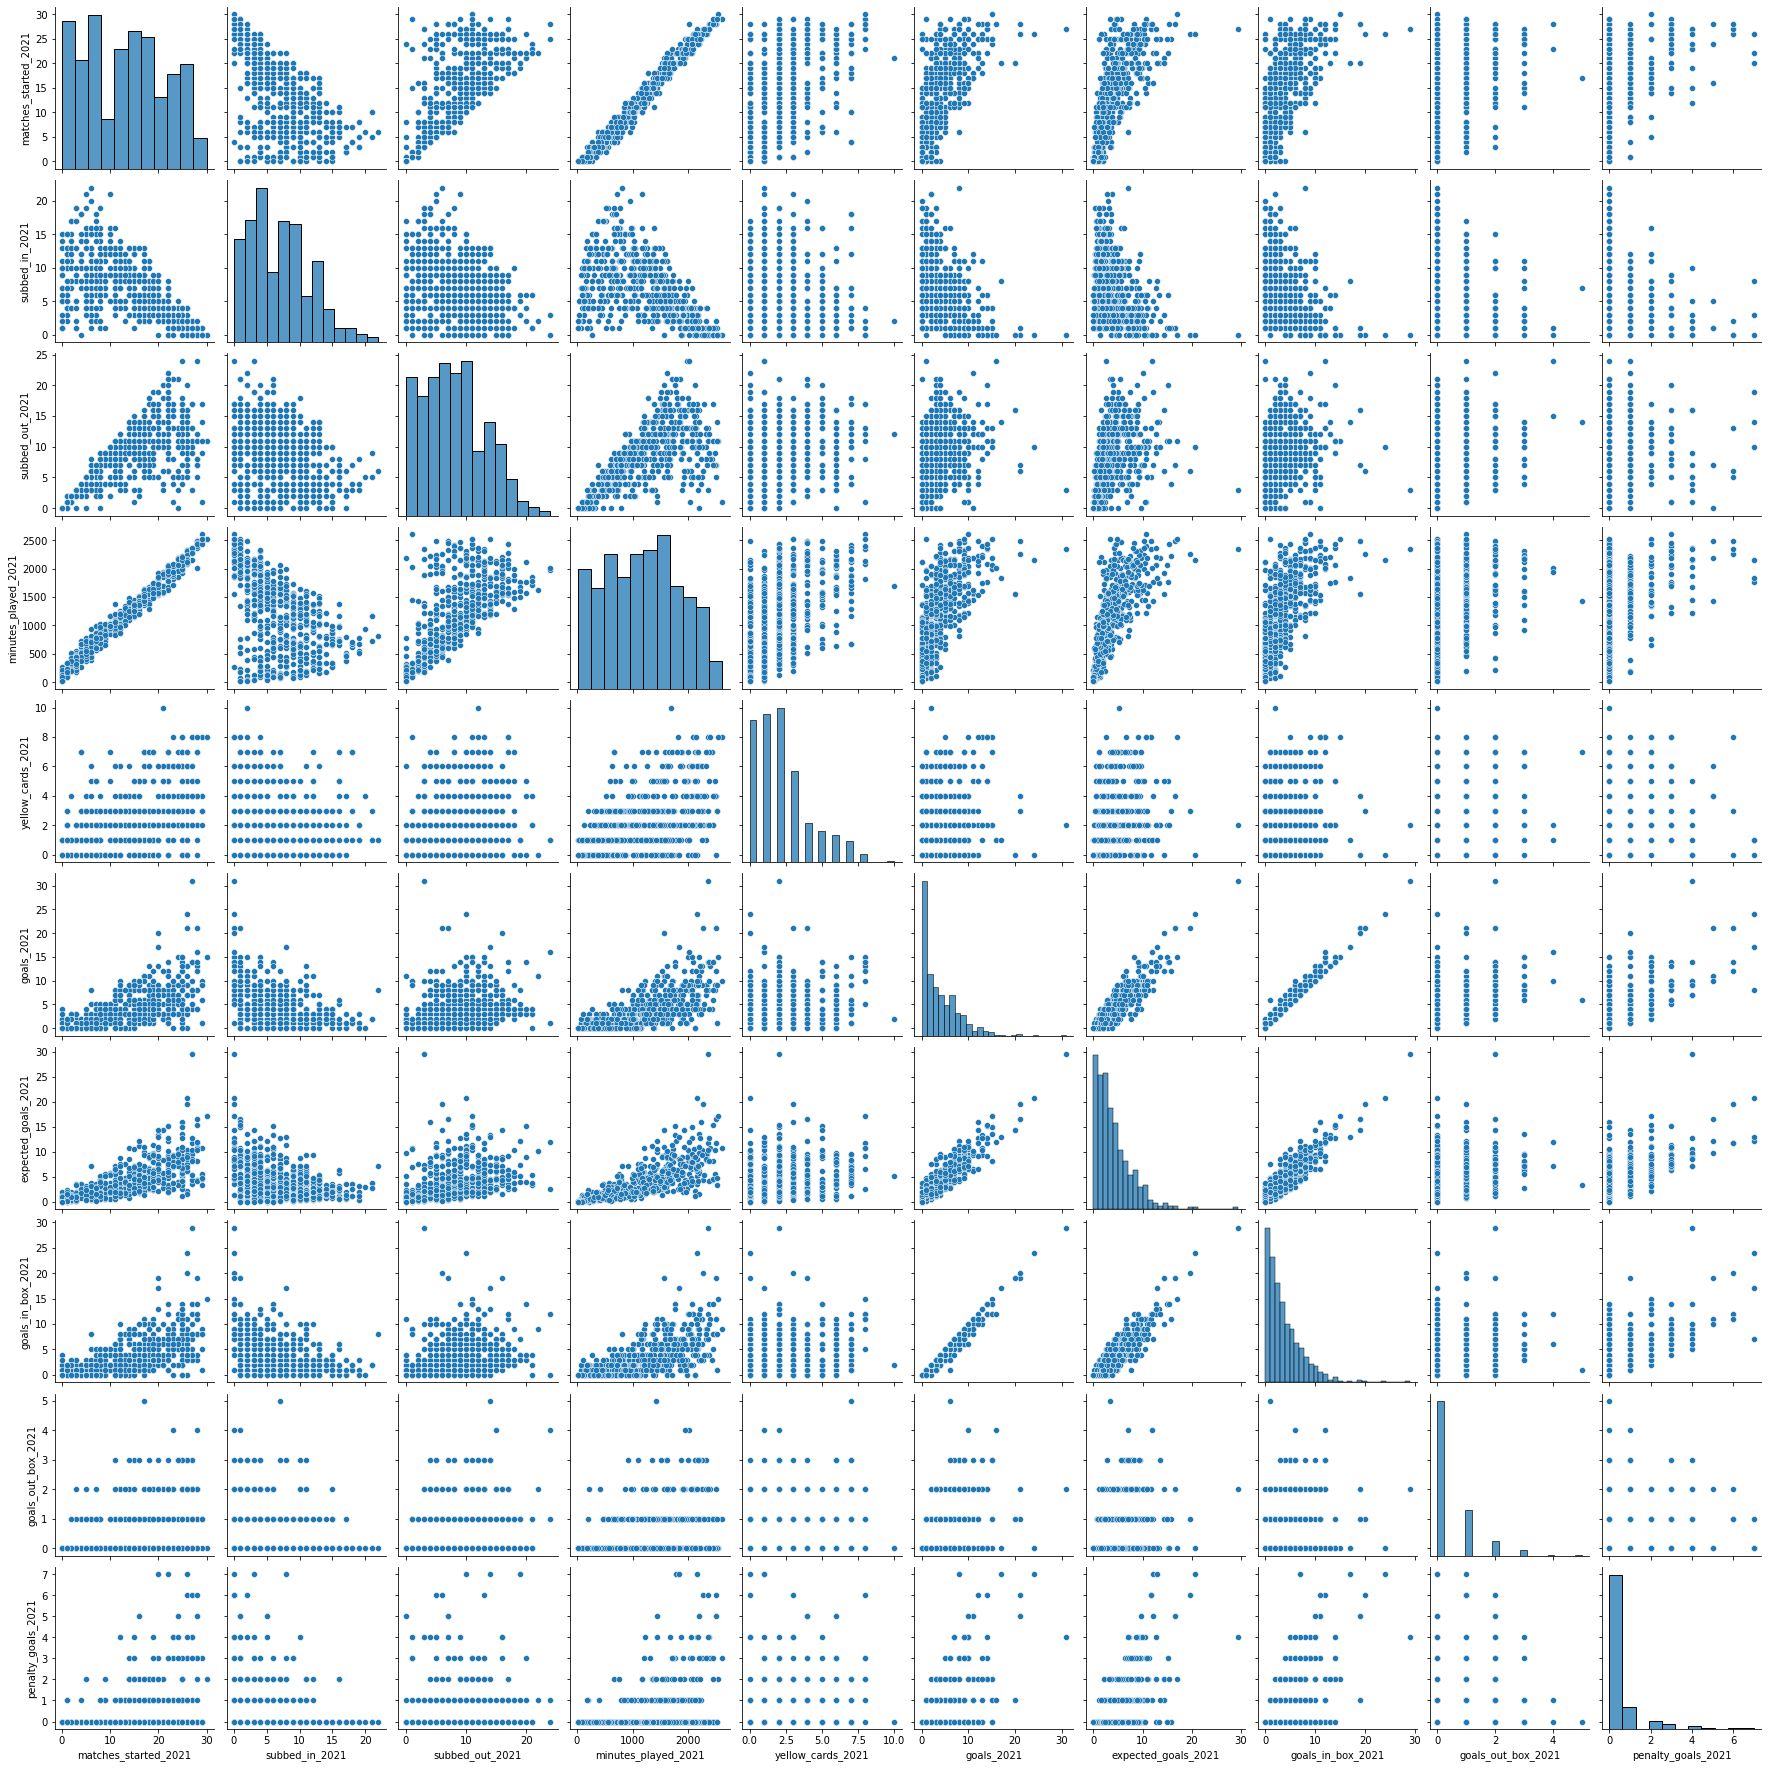

In [12]:
# look at some statistics from 2021
plt.figure(figsize=(15, 5))
sb.pairplot(data=df.iloc[:,5:15])

There appears to be a strong linear relationship between matches_started_2021 and minutes_played_2021, which makes sense since the more matches played, the more minutes played. Similarly, there is a strong linear relationship between matches_played_2021 and matches_started_2021. There is also a strong linear relationship between goals_2021 and goals_in_box_2021.

<Figure size 1080x360 with 0 Axes>

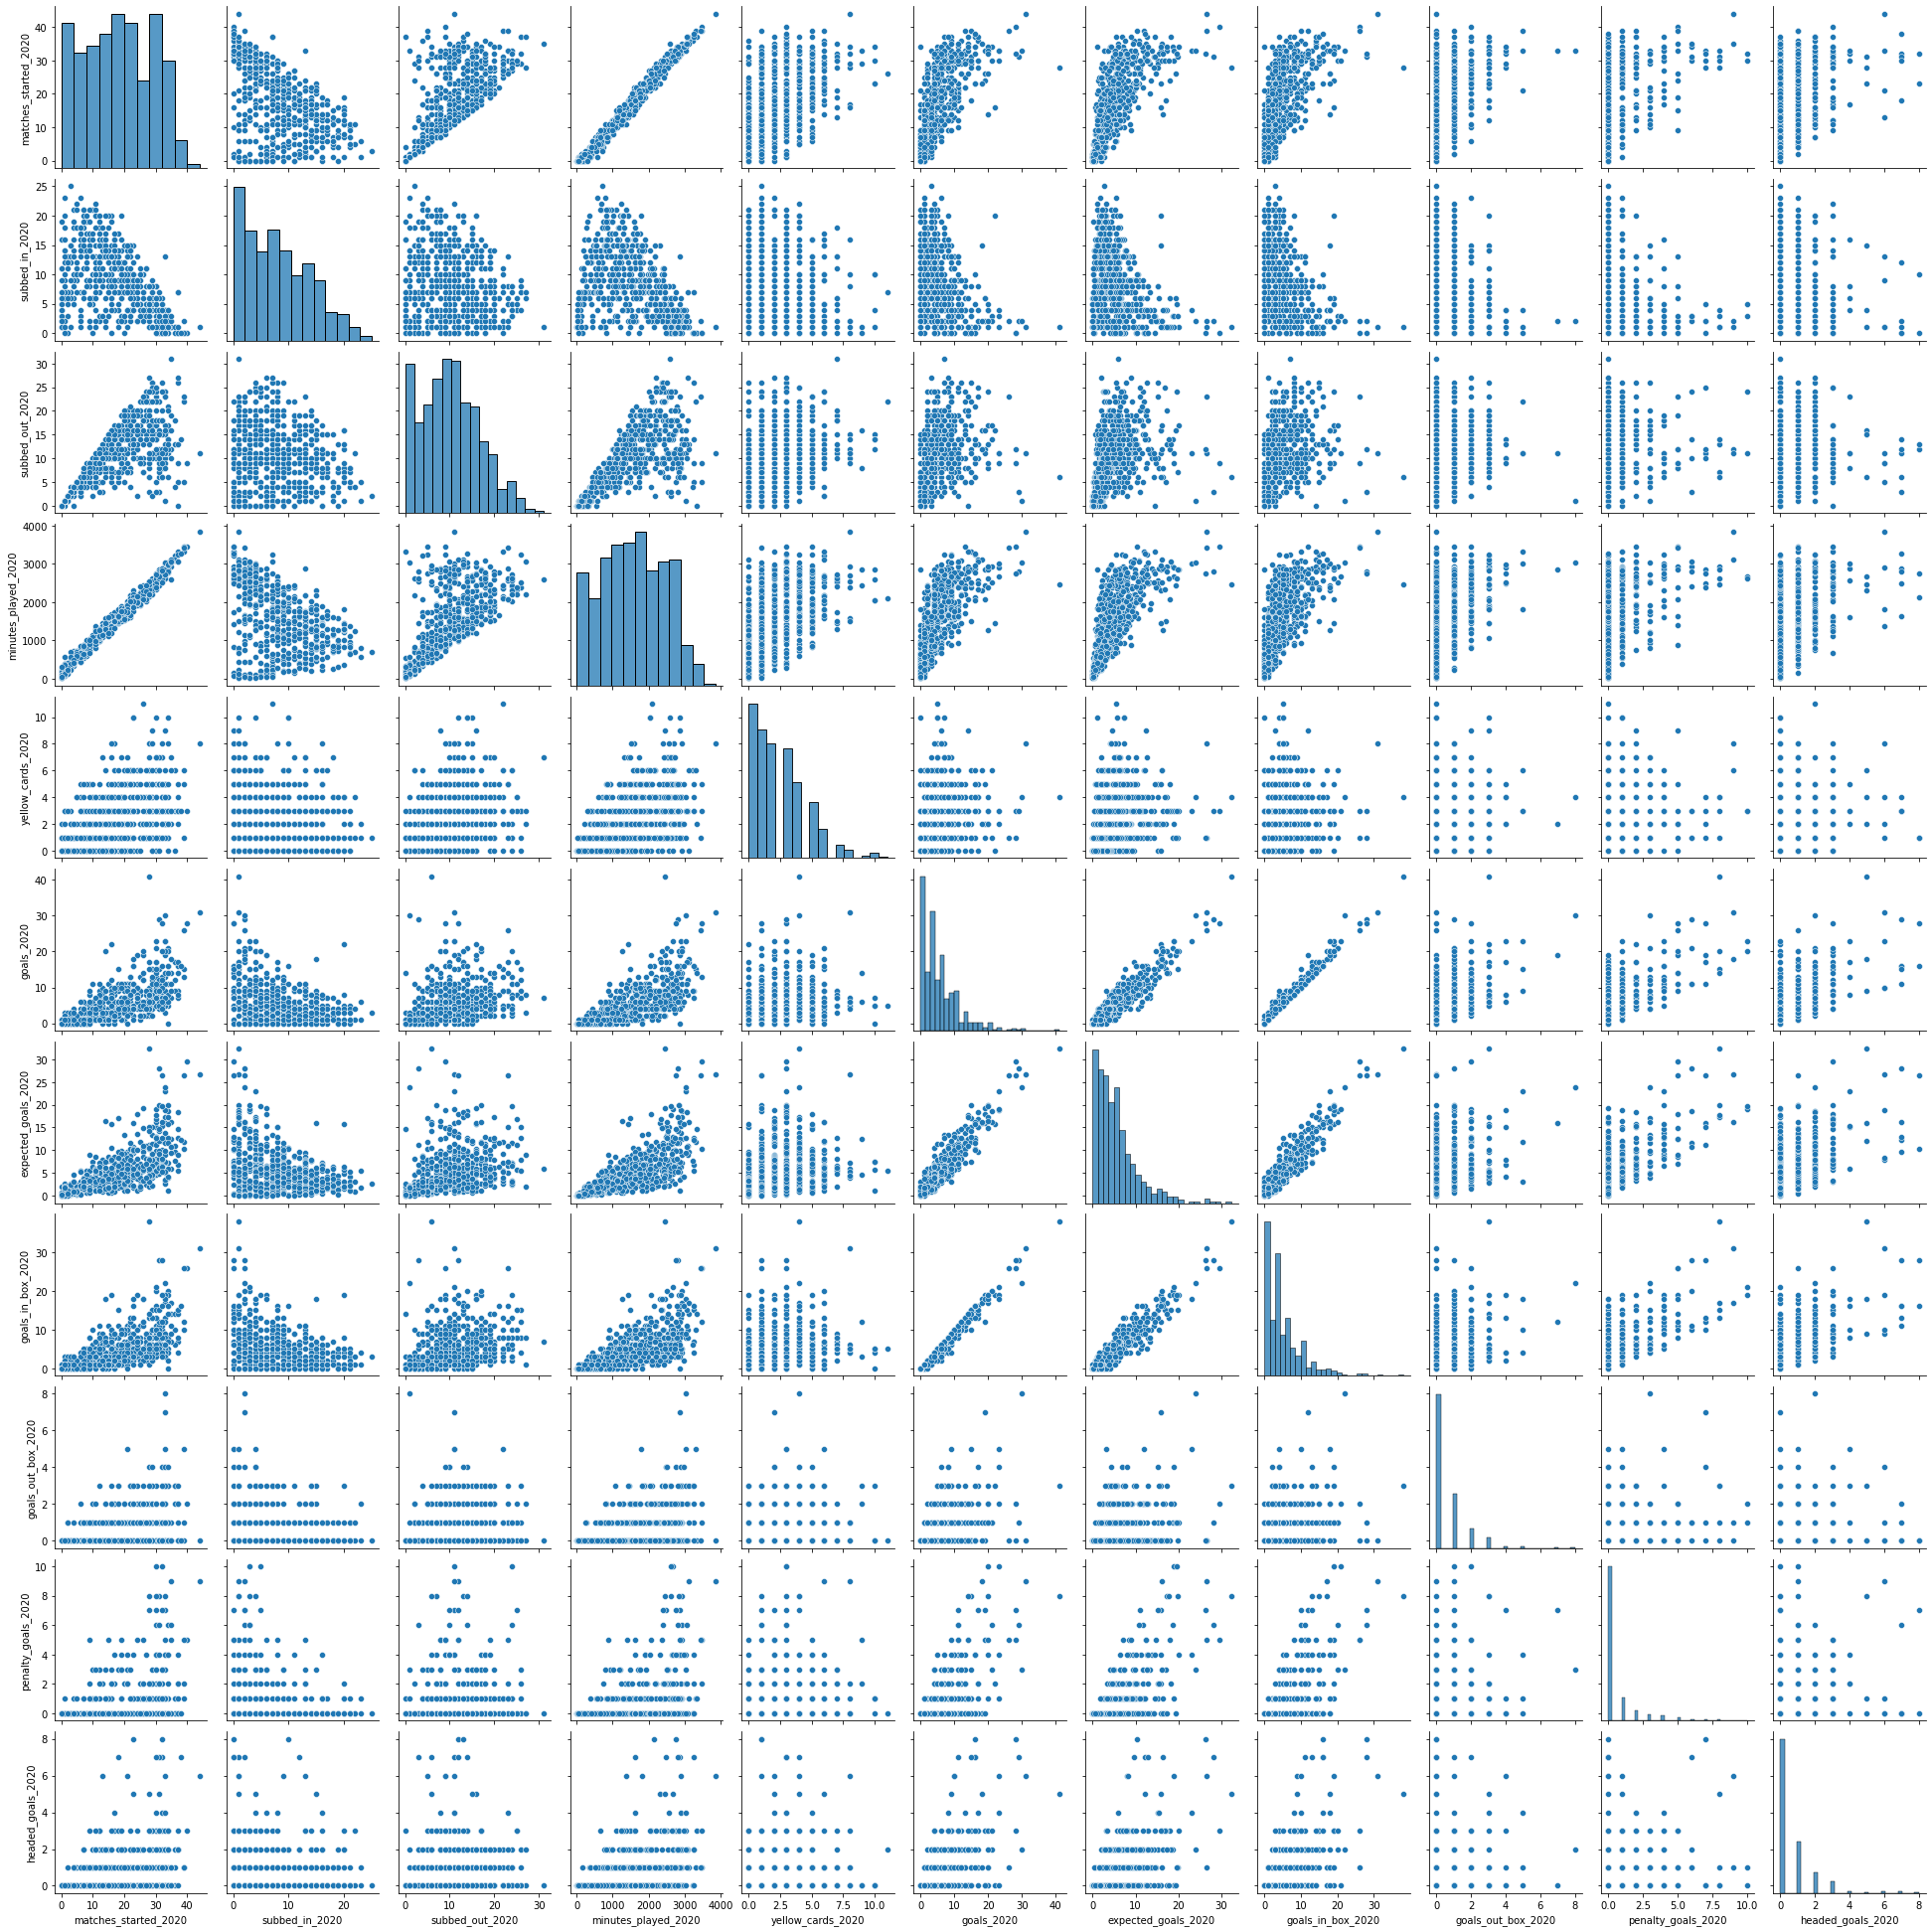

In [13]:
# look at some statistics from 2020
plt.figure(figsize=(15, 5))
sb.pairplot(data=df.iloc[:,30:41])

The relationships between variables in 2020 seem similar to that of 2021.

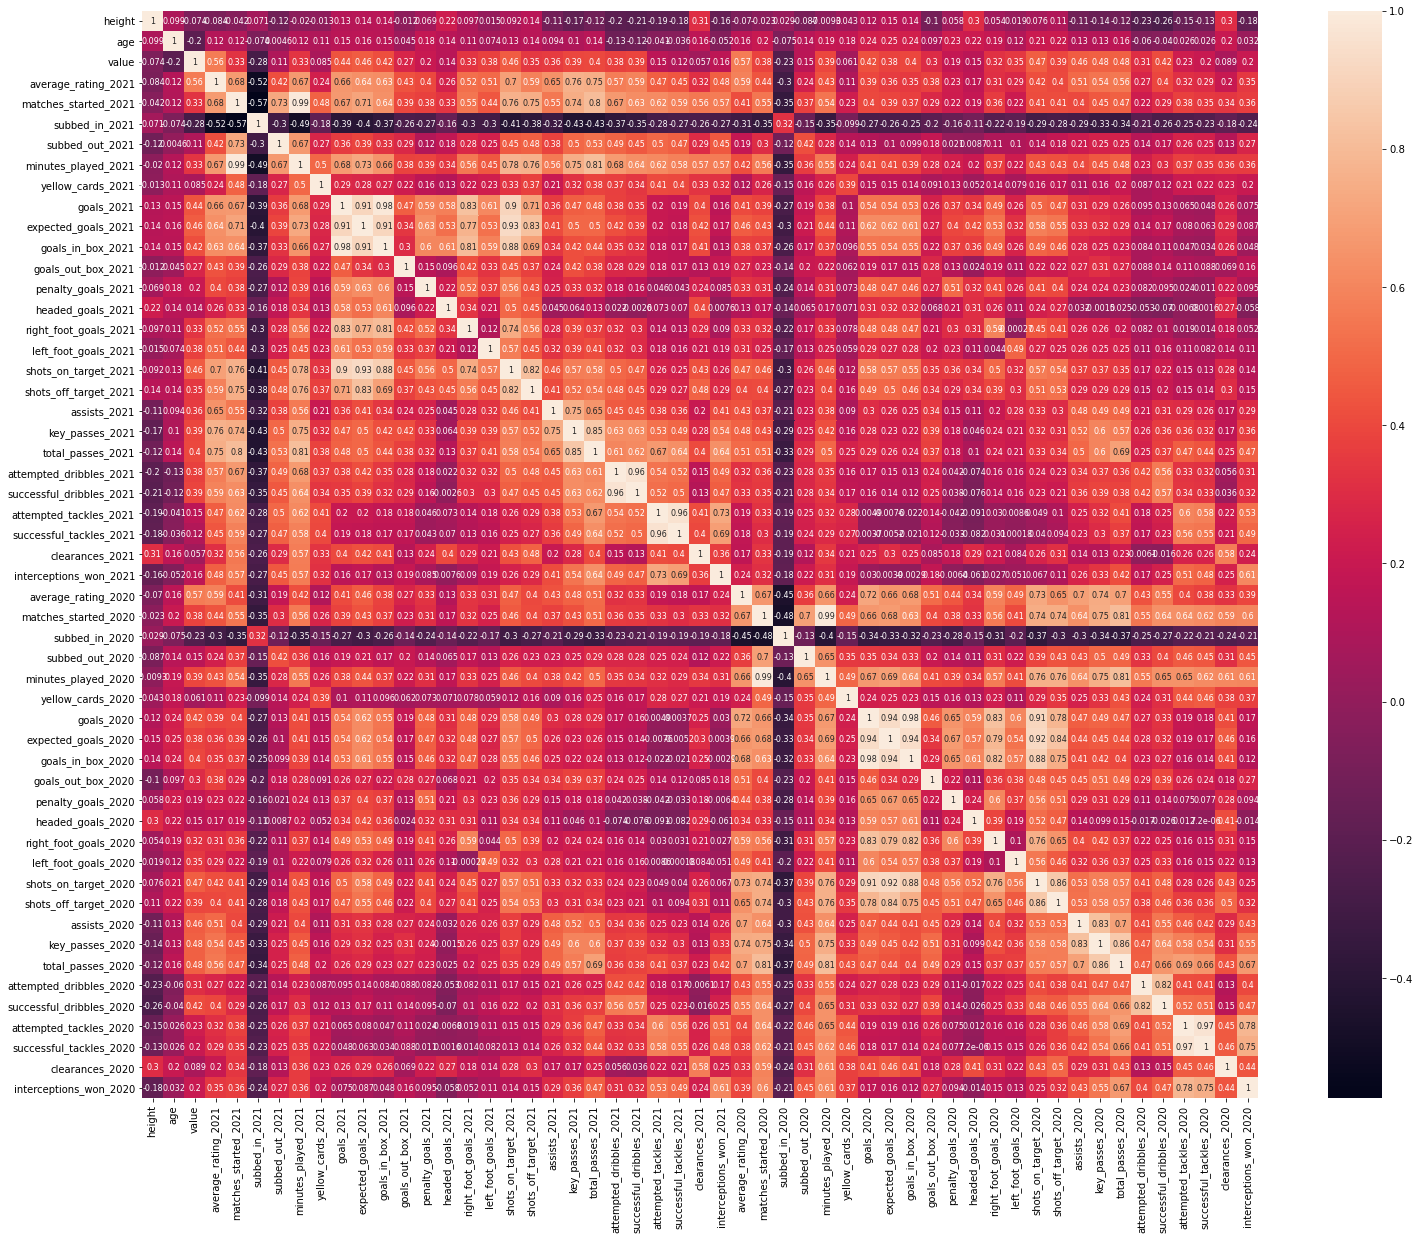

In [14]:
# plot correlation heatmap
plt.figure(figsize=(25, 20))
sb.heatmap(df.corr(), annot=True, annot_kws={"size":8})

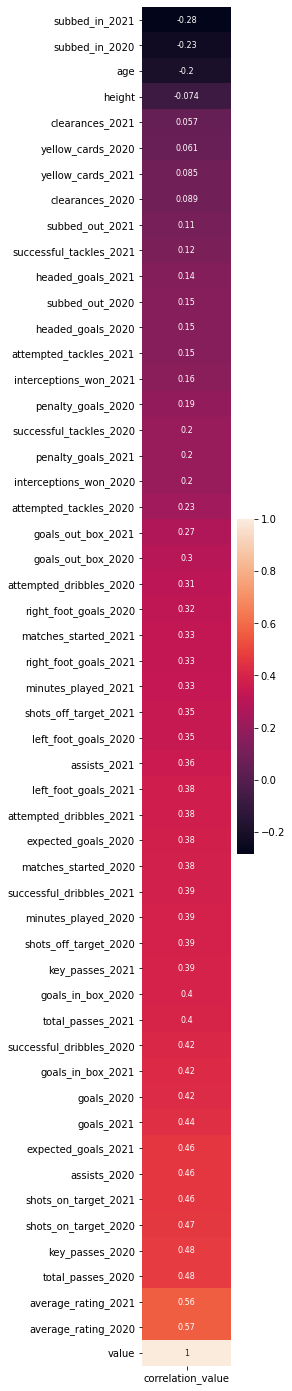

In [15]:
correlation = pd.DataFrame(df.corrwith(df['value']).sort_values(), columns = ['correlation_value'])

#Finding the correlation coefficients of market value to every predictor variables
f = plt.figure(figsize = (2, 25))
sb.heatmap(correlation, annot=True, annot_kws={"size":8})

There are some variables that are highly correlated with each other, such as attempted_tackles_2020 and successful_tackles_2020 with a correlation of 0.97, goals_2021 and goals_in_box_2021 with a correlation of 0.98. This indicates that multicollinearity exists in the dataset.

# Linear Regression

We first perform linear regression on all the variables to check its performance. To ensure that the linear regression only predicts positive values, we perform a logarithmic transformation on the response variable "value" so we will be predicting the "log_value" instead.

In [16]:
df['log_value'] = np.log(df['value'])
df['log_value']

0      2.140066
1      3.091042
2      1.163151
3      2.397895
4      1.435085
         ...   
565   -0.430783
566    1.609438
567    1.704748
568    0.788457
569    0.182322
Name: log_value, Length: 560, dtype: float64

Next, we split the data into 80% training and 20% test sets.

In [17]:
from sklearn.model_selection import train_test_split

resp = df[['log_value']]
pred = df.drop(columns = ['name', 'value', 'log_value'])

pred_train, pred_test, resp_train, resp_test = train_test_split(pred, resp, test_size = 0.2, random_state=1)

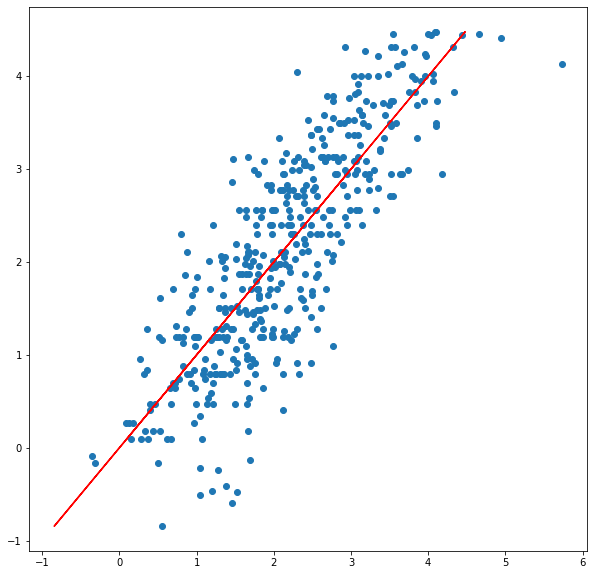

In [18]:
model = LinearRegression()

model.fit(pred_train, resp_train)

predicted_train = model.predict(pred_train)

f = plt.figure(figsize = (10,10))
plt.scatter(predicted_train, resp_train)
plt.plot(resp_train, resp_train, color = 'red')

In [19]:
mean_squared_error(np.exp(predicted_train), np.exp(resp_train))

264.56951212765676

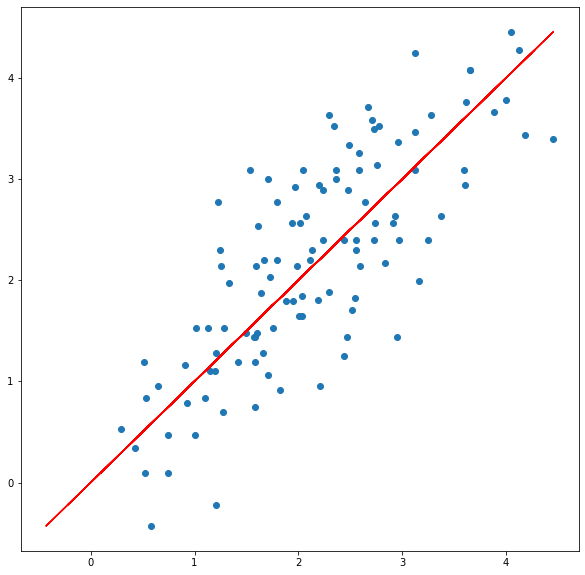

In [20]:
predicted_test = model.predict(pred_test)

f = plt.figure(figsize = (10,10))
plt.scatter(predicted_test, resp_test)
plt.plot(resp_test, resp_test, color = 'red')

In [21]:
score1 = r2_score(resp_test, predicted_test)
score1

0.6124299824151251

In [22]:
mse1 = mean_squared_error(np.exp(predicted_test), np.exp(resp_test))
mse1

146.45024016416988

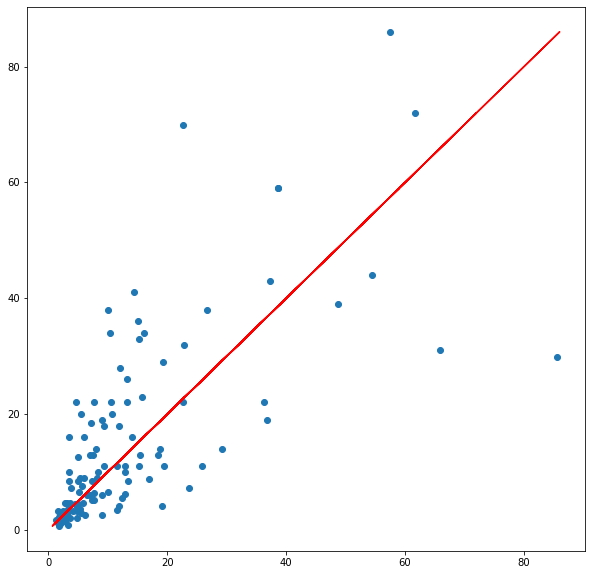

In [23]:
plt.figure(figsize = (10,10))
plt.scatter(np.exp(predicted_test), np.exp(resp_test), vmax = 50)
plt.plot(np.exp(resp_test), np.exp(resp_test), color = 'red')

## Linear Regression (with higher order terms)

The main limitation of this linear regression model is that it assumes the response variable has a linear relationship against every predictor variables. For example, the log of market value (the response variable) may not have a linear relationship with age, though we know they are inversely related, where younger players tend to have higher market value. We try to improve this model by adding higher order terms for predictor variables having correlation coefficient with absolute value higher than 0.5, which are average_rating_2020 and average_rating_2021. We will also add the second order term of age variable, as even though its correlation coefficient is less than 0.5, we understand that age may have a complex relationship with market value that we try to factor in.

In [24]:
correlation[abs(correlation['correlation_value']) > 0.5]

,correlation_value
average_rating_2021,0.563982
average_rating_2020,0.566558
value,1.000000


In [25]:
df['ratingsq2020'] = np.square(df['average_rating_2020'])
df['ratingsq2021'] = np.square(df['average_rating_2021'])
df['agesq'] = np.square(df['age'])

0.6431267219862531

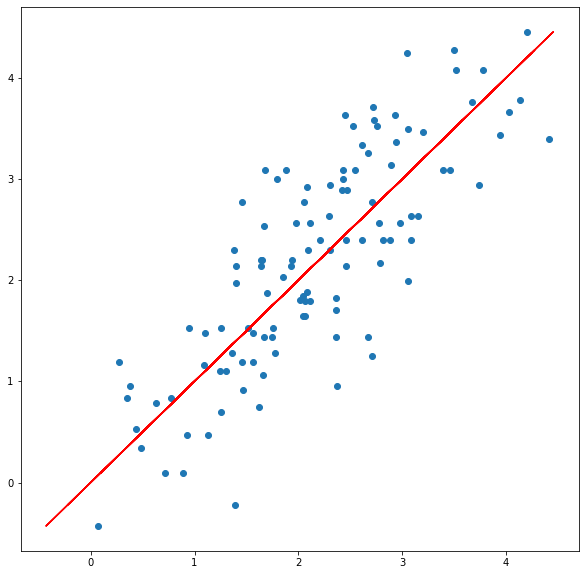

In [26]:
resp = df[['log_value']]
pred = df.drop(columns = ['name', 'value', 'log_value'])

pred_train, pred_test, resp_train, resp_test = train_test_split(pred, resp, test_size = 0.2, random_state=1)

model = LinearRegression()

model.fit(pred_train, resp_train)

predicted_test = model.predict(pred_test)

f = plt.figure(figsize = (10,10))
plt.scatter(predicted_test, resp_test)
plt.plot(resp_test, resp_test, color = 'red')

model.score(pred_test, resp_test)

In [27]:
score2 = r2_score(resp_test, predicted_test)
score2

0.6431267219862531

In [28]:
mse2 = mean_squared_error(np.exp(predicted_test), np.exp(resp_test))
mse2

144.95331830442498

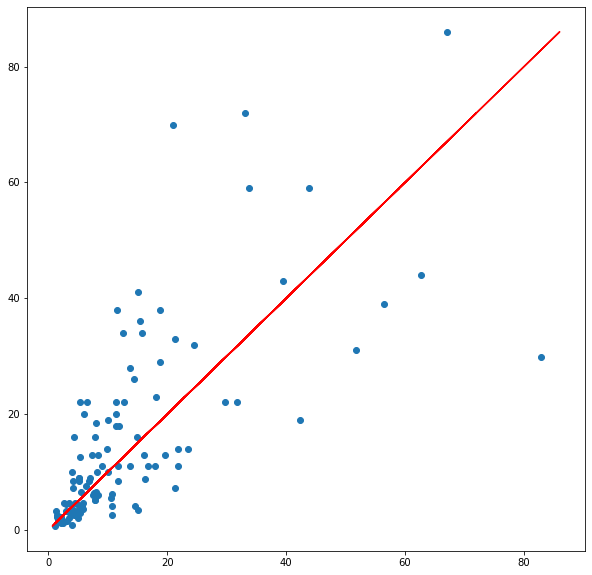

In [29]:
plt.figure(figsize = (10,10))
plt.scatter(np.exp(predicted_test), np.exp(resp_test), vmax = 50)
plt.plot(np.exp(resp_test), np.exp(resp_test), color = 'red')

We notice a slight improvement in the MSE value and R^2 value of the test set after this change.

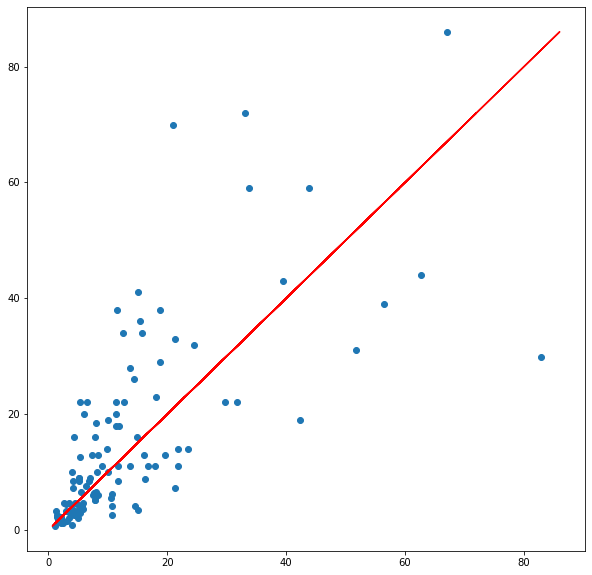

In [30]:
plt.figure(figsize = (10,10))
plt.scatter(np.exp(predicted_test), np.exp(resp_test), vmax = 50)
plt.plot(np.exp(resp_test), np.exp(resp_test), color = 'red')

# Ridge Regression

We also try ridge regression and check its performance. α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. The larger the value of α, the more coefficients will be reduced to values close to 0. To select the best value of α, we perform 5-fold cross-validation.

In [31]:
resp = df[['log_value']]
pred = df.drop(columns = ['name', 'value', 'log_value'])

pred_train, pred_test, resp_train, resp_test = train_test_split(pred, resp, test_size = 0.2, random_state=1)

In [32]:
#define model
model = RidgeCV(alphas=np.arange(1, 10000, 1)/100, cv=5, scoring='r2', normalize=True)

#fit model
model.fit(pred_train, resp_train)

#display lambda that produced the highest r2
print(model.alpha_)

0.17


In [33]:
ridge = Ridge(alpha=model.alpha_)
ridge.fit(pred_train,resp_train)

Ridge(alpha=0.17)

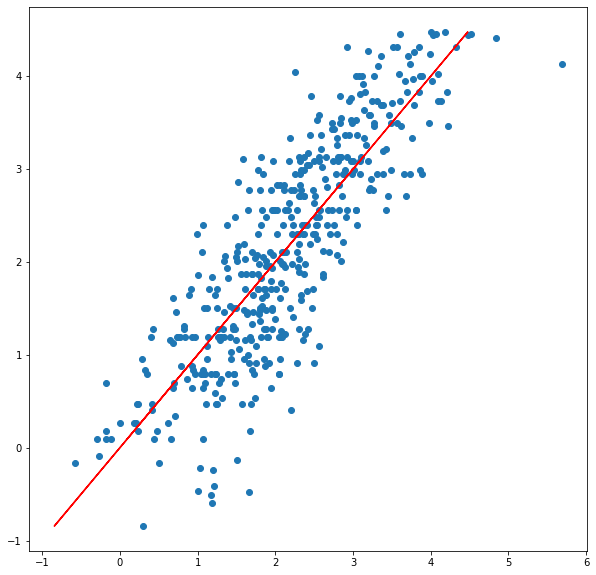

In [34]:
predicted_train = ridge.predict(pred_train)
plt.figure(figsize = (10,10))
plt.scatter(predicted_train, resp_train)
plt.plot(resp_train, resp_train, color = 'red')

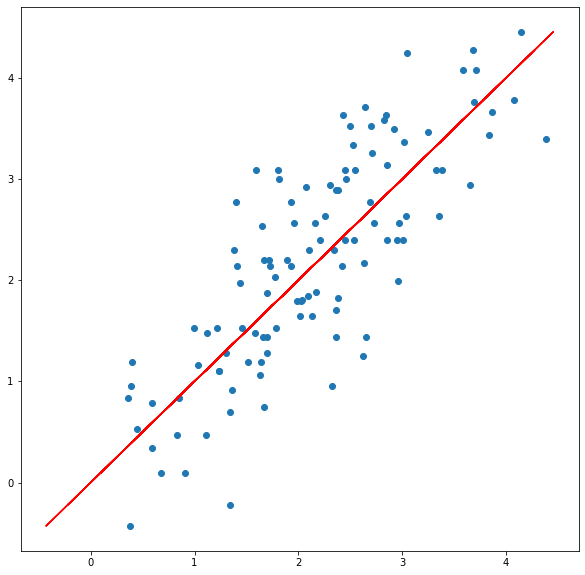

In [35]:
predicted_test = ridge.predict(pred_test)
plt.figure(figsize = (10,10))
plt.scatter(predicted_test, resp_test)
plt.plot(resp_test, resp_test, color = 'red')

In [36]:
score3 = r2_score(resp_test, predicted_test)
score3

0.6448971342819805

In [37]:
mse3 = mean_squared_error(np.exp(resp_test), np.exp(predicted_test))
mse3

134.5894783980847

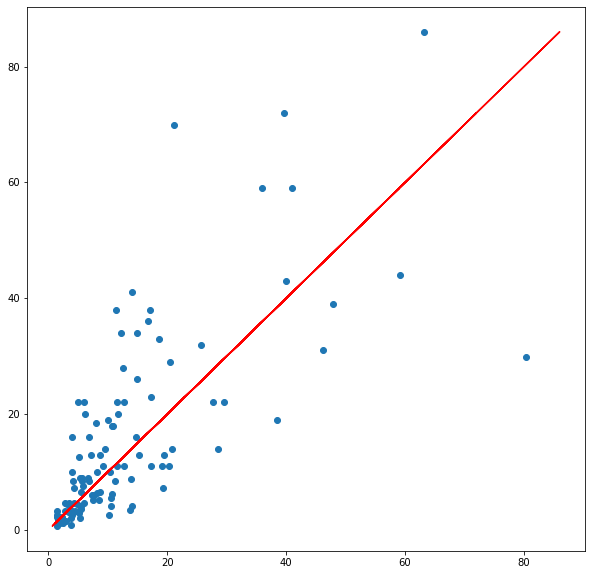

In [38]:
plt.figure(figsize = (10,10))
plt.scatter(np.exp(predicted_test), np.exp(resp_test), vmax = 50)
plt.plot(np.exp(resp_test), np.exp(resp_test), color = 'red')

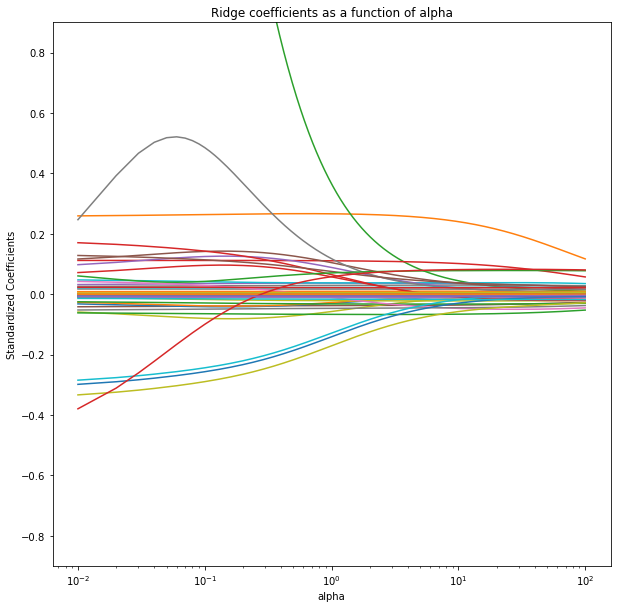

In [39]:
alphas = np.arange(1, 10000, 1)/100
ridge = Ridge(max_iter=10000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(pred_train, resp_train)
    coefs.append(ridge.coef_)

plt.figure(figsize = (10,10))
ax = plt.gca()

coefs = np.array(coefs).reshape(9999,np.array(coefs).shape[2])
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylim(-0.90,0.90)
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of alpha');

We can see that as α increases, the magnitude of the coefficients decreases, where the values reaches close to 0 but not absolute 0.

# Lasso Regression

We also try lasso regression and check its performance. Similarly, we determine the optimum value of α using cross validation.

In [40]:
#define model
model = LassoCV(alphas=np.arange(1, 10000, 1)/100, cv=5, normalize=True)

#fit model
model.fit(pred_train, resp_train)

#display lambda that produced the highest r2
print(model.alpha_)

0.01


In [41]:
lasso = Lasso(alpha=model.alpha_)
lasso.fit(pred_train, resp_train)

Lasso(alpha=0.01)

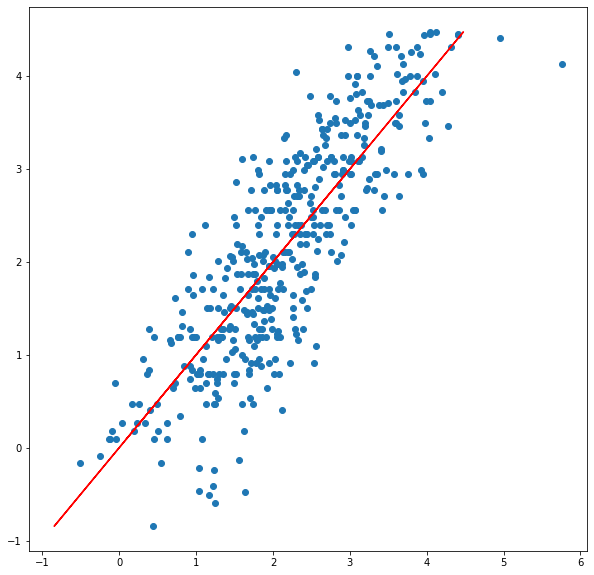

In [42]:
predicted_train = lasso.predict(pred_train)
plt.figure(figsize = (10,10))
plt.scatter(predicted_train, resp_train)
plt.plot(resp_train, resp_train, color = 'red')

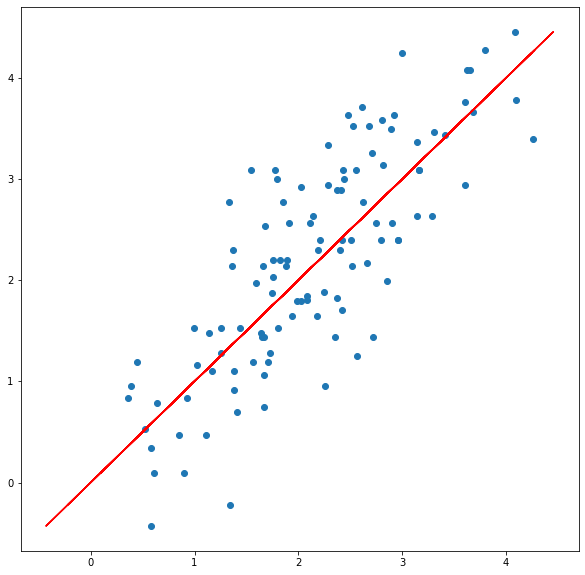

In [43]:
predicted_test = lasso.predict(pred_test)
plt.figure(figsize = (10,10))
plt.scatter(predicted_test, resp_test)
plt.plot(resp_test, resp_test, color = 'red')

In [44]:
score4 = r2_score(resp_test, predicted_test)
score4

0.640337661964369

In [45]:
mse4 = mean_squared_error(np.exp(resp_test), np.exp(predicted_test))
mse4

123.10347326169641

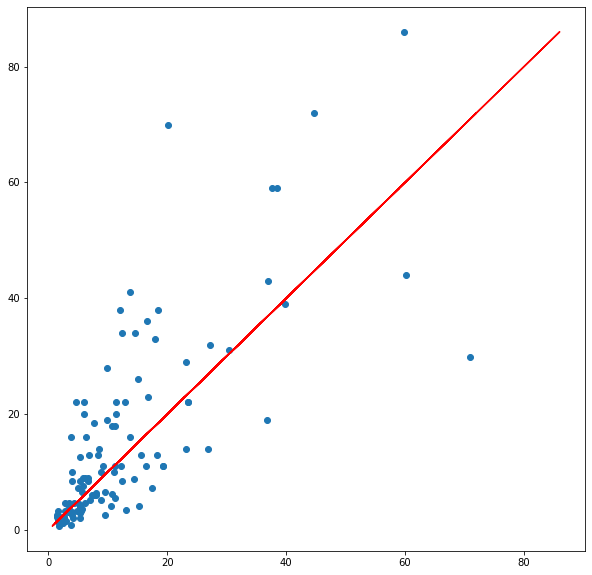

In [46]:
plt.figure(figsize = (10,10))
plt.scatter(np.exp(predicted_test), np.exp(resp_test), vmax = 50)
plt.plot(np.exp(resp_test), np.exp(resp_test), color = 'red')

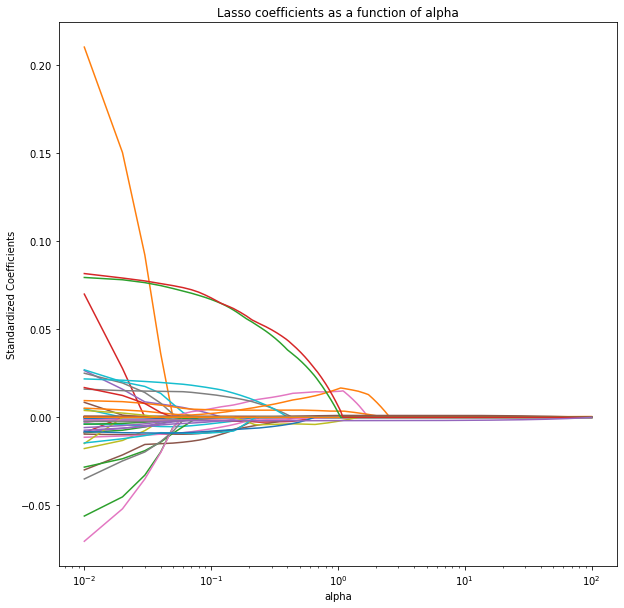

In [47]:
alphas = np.arange(1, 10000, 1)/100
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(pred_train, resp_train)
    coefs.append(lasso.coef_)

plt.figure(figsize = (10,10))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

We can see that as α increases, more coefficients get reduced to 0. However, comparing between ridge and lasso regression, lasso reduces the coefficients faster and they get reduced to absolute 0 unlike in ridge regression where they get reduced to values close to 0.

# Random Forest Regression

We also try random forest for regression and check its performance. Random forest regression operates by constructing a multitude of decision trees at training time and outputting mean prediction (regression) of the individual trees.

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 300, max_depth = 6, random_state = 1)

rf.fit(pred_train, resp_train)

RandomForestRegressor(max_depth=6, n_estimators=300, random_state=1)

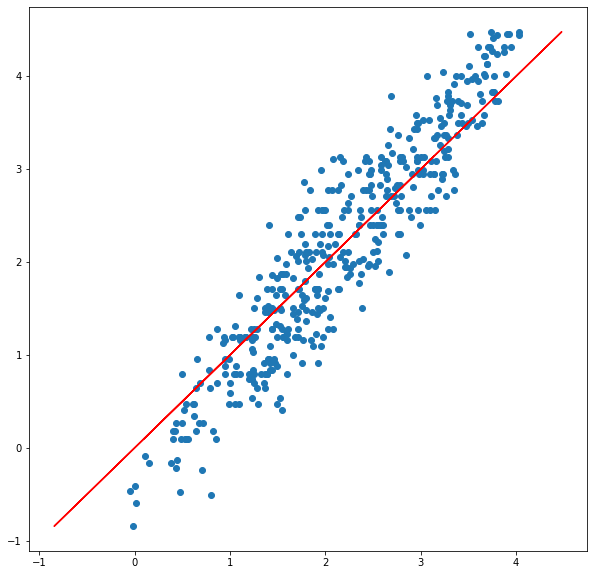

In [49]:
predicted_train = rf.predict(pred_train)
plt.figure(figsize = (10,10))
plt.scatter(predicted_train, resp_train)
plt.plot(resp_train, resp_train, color = 'red')

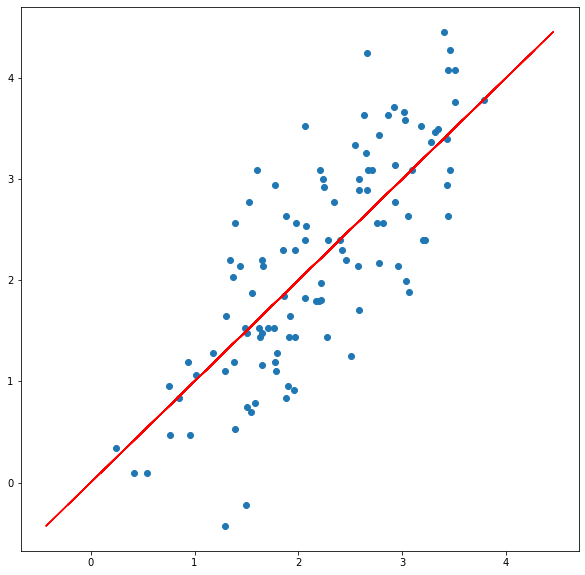

In [50]:
predicted_test = rf.predict(pred_test)
plt.figure(figsize = (10,10))
plt.scatter(predicted_test, resp_test)
plt.plot(resp_test, resp_test, color = 'red')

In [51]:
score5 = r2_score(resp_test, predicted_test)
score5

0.6063040966499413

In [52]:
mse5 = mean_squared_error(np.exp(predicted_test), np.exp(resp_test))
mse5

147.7985546636136

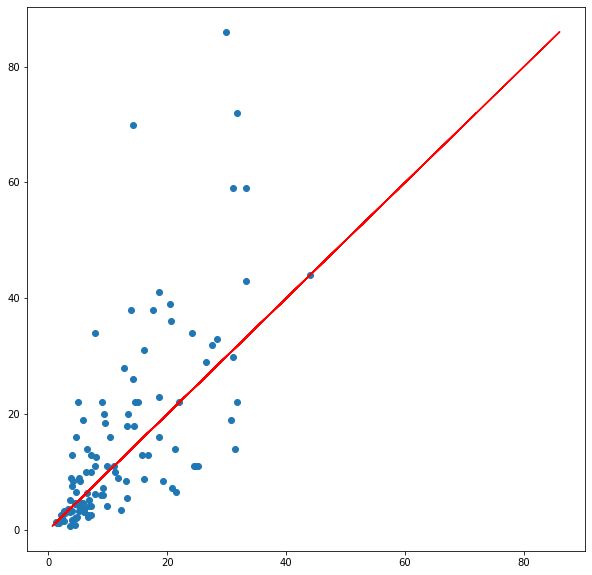

In [53]:
plt.figure(figsize = (10,10))
plt.scatter(np.exp(predicted_test), np.exp(resp_test), vmax = 50)
plt.plot(np.exp(resp_test), np.exp(resp_test), color = 'red')

# Model Comparison

In [54]:
print("Model Comparison")
print("Model \t\t\t\t\t R2 Score \t\t MSE")
print("Linear Regression \t\t\t", score1, "\t",mse1)
print("Linear Regression (higher order terms) \t", score2, "\t",mse2)
print("Ridge Regression \t\t\t", score3,"\t", mse3)
print("Lasso Regression \t\t\t", score4,"\t", mse4)
print("Random Forest Regression \t\t", score5,"\t", mse5)

Model Comparison
Model 					 R2 Score 		 MSE
Linear Regression 			 0.6124299824151251 	 146.45024016416988
Linear Regression (higher order terms) 	 0.6431267219862531 	 144.95331830442498
Ridge Regression 			 0.6448971342819805 	 134.5894783980847
Lasso Regression 			 0.640337661964369 	 123.10347326169641
Random Forest Regression 		 0.6063040966499413 	 147.7985546636136


Based on R2 score, Ridge Regression appears to be the best performing model. Based on MSE, Lasso Regression appears to be the best performing model. Since the MSE of Lasso Regression is significantly less as compared to the other models, we select it as the best performing model. Random Forest does not seem to perform well on this dataset as most of the predictors are correlated with the response so there is a strong linear relationship between the predictors and response.